## This notebook integrates a four-dimensional system to detect tunneling and non-tunneling dynamics from the right to the left well.
### Last updated: October 24, 2025

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

In [22]:
# Set Latex fonts
new_rc_params = {
    "text.usetex": True,
    "figure.dpi": 200,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.size": "12",
    "font.family": "serif",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}
mpl.rcParams.update(new_rc_params)

## model parameters

In [23]:
a = 10.0
b =  4.0
c =  0.35 
E = 9.0 + 4.680 # No tunneling
E = 14.95 + 4.680 # Tunneling

In [24]:
# Calcuate fixed point value for the variance for the potential hill
x_f = 3.693980625181293 
c1 = 9.0*c/4.0
c2 = a - 5.0*b**2/(6.0*c) + 3.0*b*x_f - 9.0*c*x_f**2/2
c3 = 5.0*a*b*x_f/(6.0*c) - 2.0*a*x_f**2 - 5.0*b**2*x_f**2/(6.0*c) + 3.0*b*x_f**3 - 9.0*c*x_f**4/4 - E
coeffs = [c1, c2, c3]
sols = np.roots(coeffs)
V_f  = sols[0]
#print(sols)

# Skewness
S = -1/c*(a*x_f - b*V_f - b*x_f**2 + 3*c*V_f*x_f+ c*x_f**3)
print("Skewness =",S)
check1 = 4*E - a*(4*V_f + 2*x_f**2) + b*(10/3*S+8*V_f*x_f + 4/3*x_f**3) - c*(9*V_f**2 + 10*S*x_f + 12*V_f*x_f**2 + x_f**4)
check2 = -a*x_f + b*(V_f+x_f**2) - c*(S+3*V_f*x_f +x_f**3)
if check1 < 10**(-10) and check2 < 10**(-10):
    print("Skewness computed correctly!")

Skewness = 2.458739865089135
Skewness computed correctly!


## Verify the fixed point

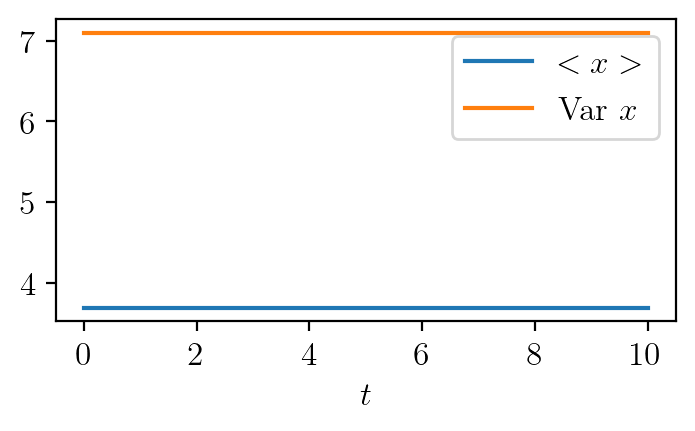

In [25]:
# Import the ModelFlow class from the flow_asym_double_well module
from flow_asym_double_well import ModelFlow

# Set the initial position to the fixed point (potential hill at x_f = 3.6041)
x_in = x_f

# Set the initial variance at the fixed point, computed previously
V_in = V_f

# Initialize the flow model with parameters: energy (E), and coefficients a, b, c, and skewness (S)
flow = ModelFlow(energy=E, a=a, b=b, c=c, skewness=S)

# Define the time span for the trajectory simulation (from 0 to 10)
t_span = (0, 10)

# Generate 10 evenly spaced time points between 0 and 10 for evaluation
t_eval = np.linspace(0, 10, 10)

# Define initial conditions for the differential equation: [position, velocity, variance, variance derivative]
point = [x_in, 0, V_in, 0]

# Solve the system of differential equations using solve_ivp with the LSODA method
# flow.flow: the function defining the system of ODEs
# t_span: time interval for integration
# point: initial conditions
# method='BDF': Implicit method using Backward Differentiation Formula, suitable for stiff ODEs
# t_eval: specific time points to evaluate the solution
# rtol, atol: relative and absolute tolerances for numerical accuracy
# max_step: maximum step size for the solver to ensure stability

sol = solve_ivp(flow.flow, t_span, point, method='BDF', t_eval=t_eval, rtol=1e-12, atol=1e-12, max_step=0.01)

# Check for invalid values (NaN or infinity) in the solution
if np.any(np.isnan(sol.y)) or np.any(np.isinf(sol.y)):
    print("NaN or inf detected in solution")

# Extract the position values from the solution (first component)
x_vals = sol.y[0]

# Extract the variance values from the solution (third component)
var_vals = sol.y[2]

# Extract the time points corresponding to the solution
time_win = sol.t

# Create a new figure for plotting with specified size (4 inches wide, 2 inches tall)
plt.figure(figsize=(4, 2))

# Plot the position values over time, labeled as <x>
plt.plot(time_win, x_vals, label=r"$<x>$")

# Plot the variance values over time, labeled as Var x
plt.plot(time_win, var_vals, label=r"Var $x$")

# Label the x-axis as time (t)
plt.xlabel(r"$t$")

# Add a legend to the plot to identify the curves
plt.legend()

# Display the plot
plt.show()

In [26]:
# setting initial condition 
x_in = 5.5
p_in = 0.0
w_in = 0.0


# solving cubic equation to find the initial condition for the variance
coeffs = [3.0*c/4.0, a/2, p_in**2/2-E, 1.0/8.0]
sols = np.roots(coeffs)
v_in = sols[1] 
print(sols)


[-2.23886908e+01  3.33469355e+00  6.37816981e-03]


In [27]:
# Verify energy
E_verify_1= 1.0/(8.0*v_in) + p_in**2/2.0 + a/2.0*v_in + 3.0/4.0*c*v_in**2
print(E_verify_1)

x_f = x_f
Vx = V_f

c1 = 9.0*c/4.0
c2 = a - 5.0*b**2/(6.0*c) + 3.0*b*x_f - 9.0*c*x_f**2/2
c3 = 5.0*a*b*x_f/(6.0*c) - 2.0*a*x_f**2 - 5.0*b**2*x_f**2/(6.0*c) + 3.0*b*x_f**3 - 9.0*c*x_f**4/4

E_verify_2 = c1*Vx**2 + c2*Vx + c3
if abs(E - E_verify_1) < 10**(-5):
    if abs(E - E_verify_2) < 10**(-5):
        print("Energy computation checks out.")

19.62999999999999
Energy computation checks out.


## Time Series

In [28]:
# Ray-Bhattacharyya-Bhattacharjee system 2025 reference:
# https://www.sciencedirect.com/science/article/pii/S0375960124008685

from flow_asym_double_well import ModelFlow  # Import the model class

# Initialize the flow model with specified parameters
flow = ModelFlow(energy=E, a=a, b=b,c=c, skewness=S)

# Generate time points or the trajectory simulation

t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# initial conditions
point = [x_in, p_in, v_in, w_in]

sol = solve_ivp(flow.flow, t_span, point, method='BDF', t_eval=t_eval, rtol=1e-12, atol=1e-12, max_step=0.001)
if np.any(np.isnan(sol.y)) or np.any(np.isinf(sol.y)):
    print("NaN or inf detected in solution")
else:
    # Create a DataFrame with time and state variables
    data = {
        'time': sol.t,
        'x': sol.y[0],
        'p': sol.y[1],
        'v': sol.y[2],
        'w': sol.y[3]
    }
    df = pd.DataFrame(data)

    # Create filename with E and x_in values
    filename = f"Time_series_Energy_E_{E}_x_in_{x_in}.csv"

    # Save to CSV
    #df.to_csv(filename, index=False)
    #print(f"Data saved to '{filename}'")

In [29]:
# Plot mean (blue) and variance (red)
x_vals = sol.y[0]
var_vals = sol.y[2]
time_win = sol.t

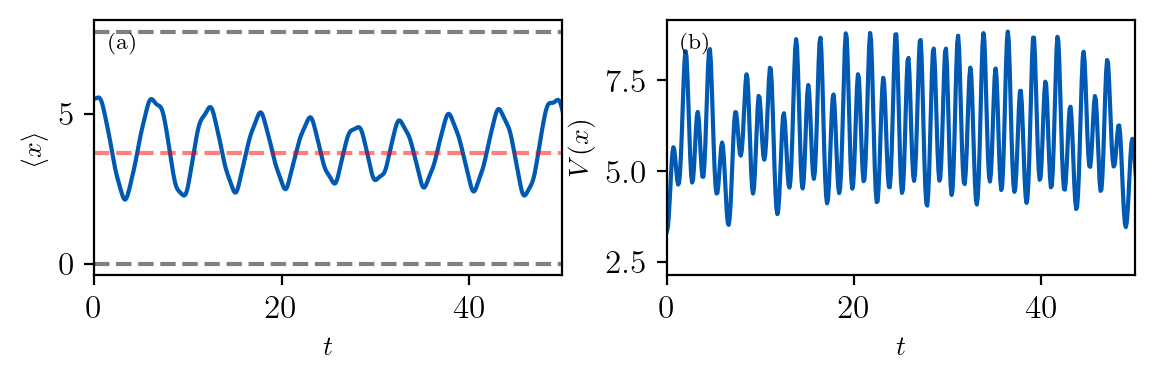

In [30]:
# Enable LaTeX rendering
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=10)
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))

# Left plot (a)
ax1.plot(time_win, x_vals, color='#0059b3', label=r'Left')  # Blue
ax1.axhline(y=0.0, color="gray", linestyle="--")
ax1.axhline(y=3.693980625181293, color="red", alpha=0.5, linestyle="--")
ax1.axhline(y=7.7345908033901365, color="gray", linestyle="--")
ax1.set_ylabel(r"$\langle x\rangle$")
ax1.set_xlabel(r'$t$')
ax1.text(0.03, 0.95, '(a)', transform=ax1.transAxes, fontsize=8, va='top')
ax1.set_xlim([0, 50])
#ax1.set_ylim([-.1, 2])
# Right plot (b)
ax2.plot(time_win, var_vals, color='#0059b3', label=r'$\langle x \rangle$')  # Blue
ax2.set_ylabel(r"$V(x)$")
ax2.set_xlabel(r'$t$')
ax2.text(0.03, 0.95, '(b)', transform=ax2.transAxes, fontsize=8, va='top')
ax2.set_xlim([0, 50])

# Adjust layout to prevent overlap
plt.tight_layout()
pass;

# Display the plot
plt.show()

In [20]:
print("Success:", sol.success)
print("Message:", sol.success)
print("Final time:", sol.t[-1], "vs t_span[1]:", t_span[1])
print("Output length:", len(sol.t), "vs t_eval length:", len(t_eval))

Success: True
Message: True
Final time: 100.0 vs t_span[1]: 100
Output length: 1000 vs t_eval length: 1000
